In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pyreadr
import fastcluster
from scipy.cluster import hierarchy
from sklearn import preprocessing, decomposition, manifold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [100]:
pip install fastcluster

In [101]:
!pip install pyreadr

In [2]:
df=pd.read_csv("data_Alka_project.csv")
df

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,degree.layout,Eccentricity,IsSingleNode,name,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,shared name,Stress,TopologicalCoefficient
0,4.587065,0.000000,0.218004,0.000000,2,2,9,False,AAED1,8.00,0,2,1,0.954012,False,0,AAED1,0,0.000000
1,3.588308,0.005205,0.278683,0.035714,16,16,8,False,AASDH,12.25,0,16,8,0.966817,False,0,AASDH,22390,0.166667
2,4.335821,0.000837,0.230637,0.333333,6,6,8,False,AAK1,6.00,0,6,3,0.957233,False,0,AAK1,2296,0.404762
3,4.741294,0.000152,0.210913,0.000000,4,4,8,False,WRAP73,4.00,0,4,2,0.952035,False,0,WRAP73,400,0.500000
4,3.516169,0.004828,0.284400,0.095238,14,14,7,False,STON2,12.00,0,14,7,0.967741,False,0,STON2,16488,0.156556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,4.388060,0.000000,0.227891,0.000000,2,2,8,False,TM4SF18,4.00,0,2,1,0.956563,False,0,TM4SF18,0,0.000000
809,4.881841,0.000000,0.204841,0.000000,2,2,9,False,TMEM9B,5.00,0,2,1,0.950233,False,0,TMEM9B,0,0.000000
810,4.983831,0.000000,0.200649,0.000000,2,2,8,False,VWA1,3.00,0,2,1,0.948925,False,0,VWA1,0,0.000000
811,4.907960,0.000000,0.203751,0.000000,2,2,8,False,ZNF250,5.00,0,2,1,0.949898,False,0,ZNF250,0,0.000000


In [3]:
df.columns.tolist()

['AverageShortestPathLength',
 'BetweennessCentrality',
 'ClosenessCentrality',
 'ClusteringCoefficient',
 'Degree',
 'degree.layout',
 'Eccentricity',
 'IsSingleNode',
 'name',
 'NeighborhoodConnectivity',
 'NumberOfDirectedEdges',
 'NumberOfUndirectedEdges',
 'PartnerOfMultiEdgedNodePairs',
 'Radiality',
 'selected',
 'SelfLoops',
 'shared name',
 'Stress',
 'TopologicalCoefficient']

In [4]:
df=df.drop(columns=['AverageShortestPathLength',
 
 'ClusteringCoefficient',
 'degree.layout',
 'Eccentricity',
 'IsSingleNode',
 'NumberOfDirectedEdges',
 'NumberOfUndirectedEdges',
 'PartnerOfMultiEdgedNodePairs',
 'Radiality',
 'selected',
 'SelfLoops',
 'shared name',
 'Stress',
 'TopologicalCoefficient'])

In [5]:
df

,BetweennessCentrality,ClosenessCentrality,Degree,name,NeighborhoodConnectivity
0,0.000000,0.218004,2,AAED1,8.00
1,0.005205,0.278683,16,AASDH,12.25
2,0.000837,0.230637,6,AAK1,6.00
3,0.000152,0.210913,4,WRAP73,4.00
4,0.004828,0.284400,14,STON2,12.00
...,...,...,...,...,...
808,0.000000,0.227891,2,TM4SF18,4.00
809,0.000000,0.204841,2,TMEM9B,5.00
810,0.000000,0.200649,2,VWA1,3.00
811,0.000000,0.203751,2,ZNF250,5.00


In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['name']= labelencoder.fit_transform(df['name'])
df

,BetweennessCentrality,ClosenessCentrality,Degree,name,NeighborhoodConnectivity
0,0.000000,0.218004,2,0,8.00
1,0.005205,0.278683,16,2,12.25
2,0.000837,0.230637,6,1,6.00
3,0.000152,0.210913,4,780,4.00
4,0.004828,0.284400,14,680,12.00
...,...,...,...,...,...
808,0.000000,0.227891,2,720,4.00
809,0.000000,0.204841,2,729,5.00
810,0.000000,0.200649,2,774,3.00
811,0.000000,0.203751,2,803,5.00


C:\Users\dell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


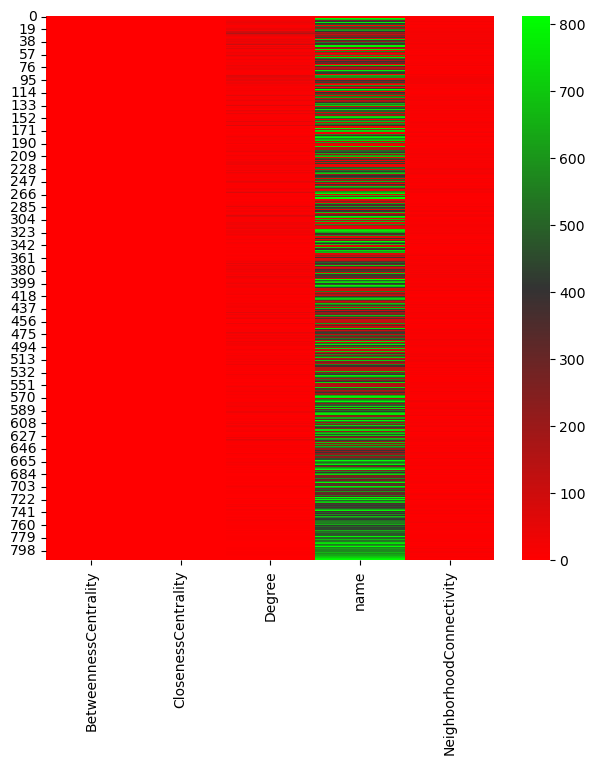

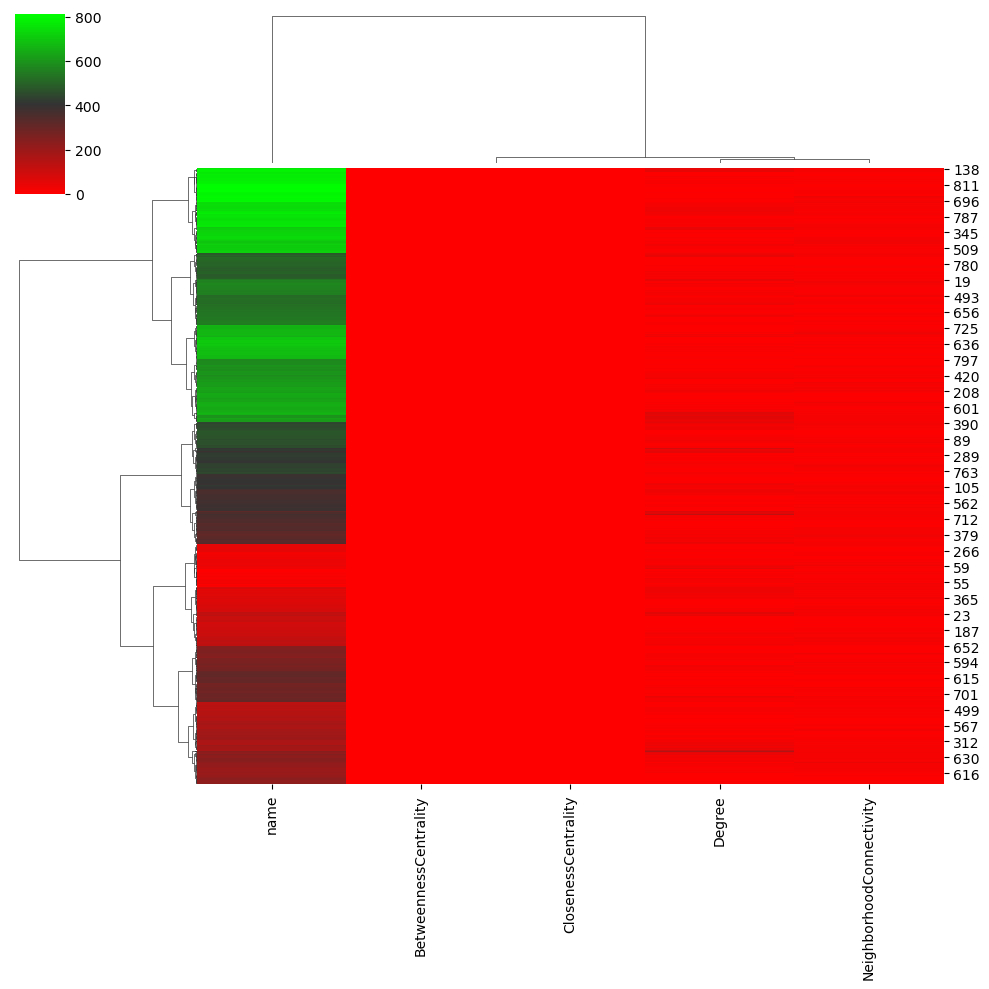

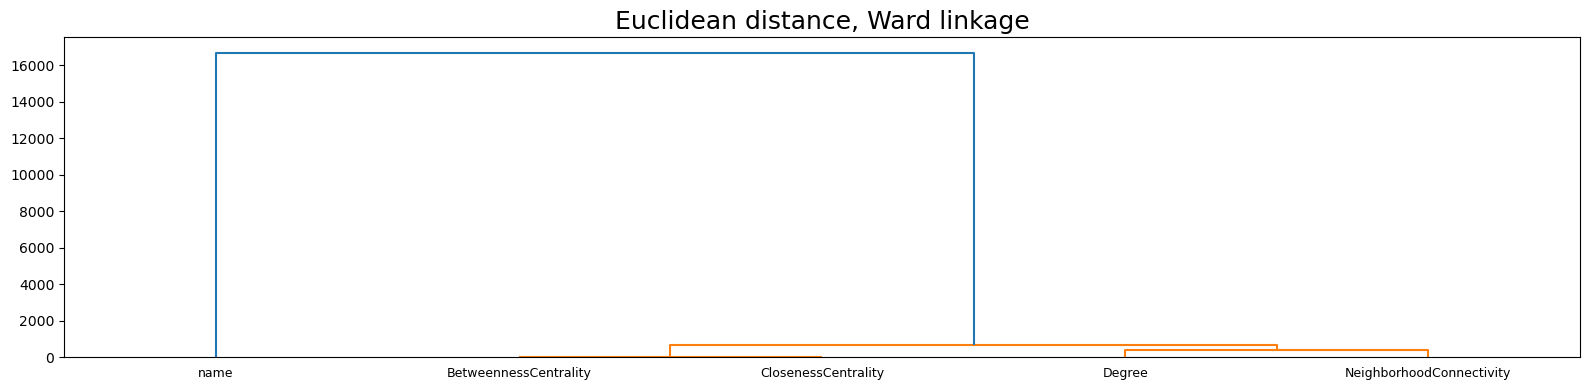

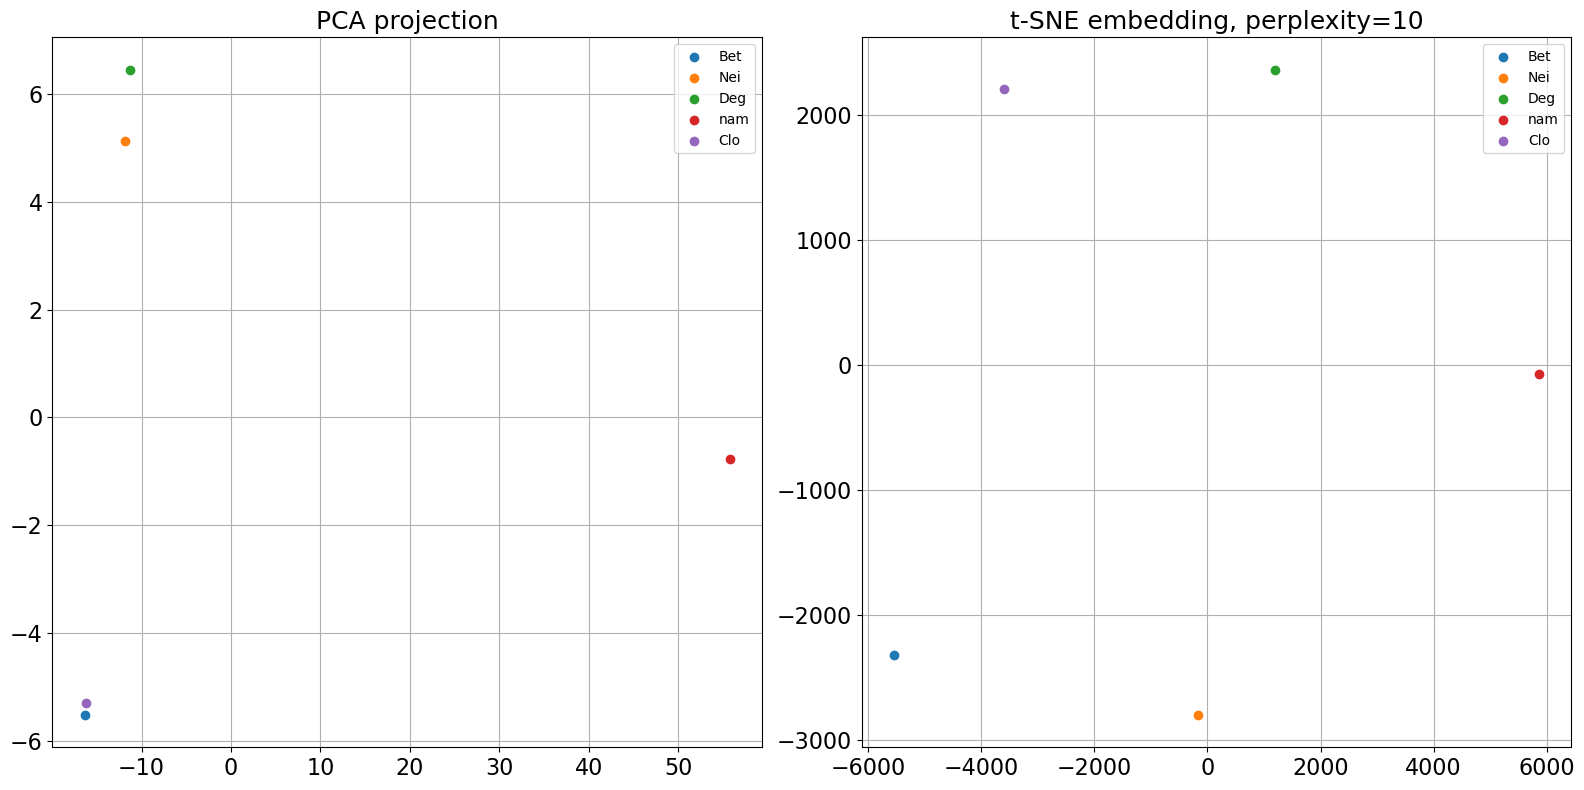

In [7]:

cmap = LinearSegmentedColormap('microarray', {
    'red': [(0.0, 1.0, 1.0), (0.5, 0.2, 0.2), (1.0, 0.0, 0.0)],
    'green': [(0.0, 0.0, 0.0), (0.5, 0.2, 0.2), (1.0, 1.0, 1.0)],
    'blue': [(0.0, 0.0, 0.0), (0.5, 0.2, 0.2), (1.0, 0.0, 0.0)],
})

import sys

def main():
    #result = pyreadr.read_r('data/leukemiaExpressionSubset.rds')
    #df = pd.DataFrame(result[None])
    #print(df)

    plt.figure(figsize=(8,8))
    sns.heatmap(df, cmap=cmap, square=False)
    plt.subplots_adjust(left=0.20, bottom=0.20)
    #plt.savefig('figure/heatmap.png')

    sns.clustermap(df, metric='euclidean', method='ward', cmap=cmap)
    #plt.savefig('figure/clustermap.png')

    plt.figure(figsize=(16,4))
    plt.title('Euclidean distance, Ward linkage', fontsize=18)
    linkage = fastcluster.linkage(df.T, metric='euclidean', method='ward')
    dendrogram = hierarchy.dendrogram(linkage, labels=list(df.T.index), leaf_font_size=9)
    plt.tight_layout()
   # plt.savefig('figure/dendrogram.png')

    # PCA
    pca = decomposition.PCA(n_components=2)

    proj = pca.fit_transform(preprocessing.scale(df.T))
    proj = pd.DataFrame(proj, index=df.T.index)

    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    for label in set(df.T.index.str[:3]):
        cond = df.T.index.str.startswith(label)
        plt.scatter(proj.loc[cond,0], proj.loc[cond,1], label=label)
    plt.legend()
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('PCA projection', fontsize=18)

    # t-SNE
    perplexity = 10
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=123, perplexity=perplexity)
    embed = tsne.fit_transform(df.T)
    embed = pd.DataFrame(embed, index=df.T.index)

    plt.subplot(1, 2, 2)
    for label in set(df.T.index.str[:3]):
        cond = df.T.index.str.startswith(label)
        plt.scatter(embed.loc[cond,0], embed.loc[cond,1], label=label)
    plt.legend()
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('t-SNE embedding, perplexity=%d' % perplexity, fontsize=18)

    plt.tight_layout()
   # plt.savefig('figure/embedding.png')

if __name__ == '__main__':
    main()

In [8]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.220587,-0.893158
1,0.435701,-0.874408


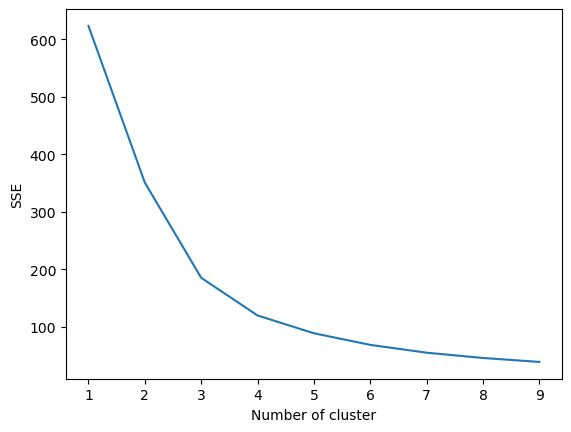

In [9]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

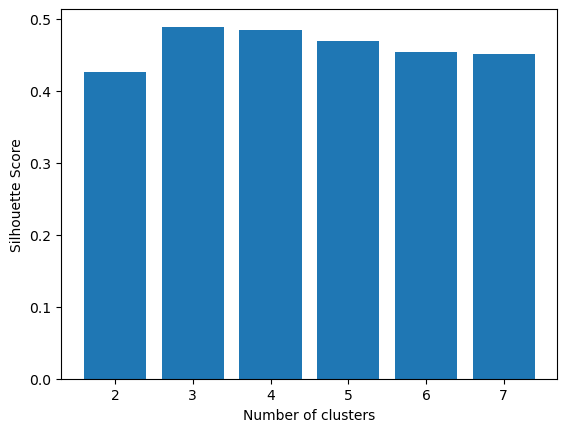

In [10]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

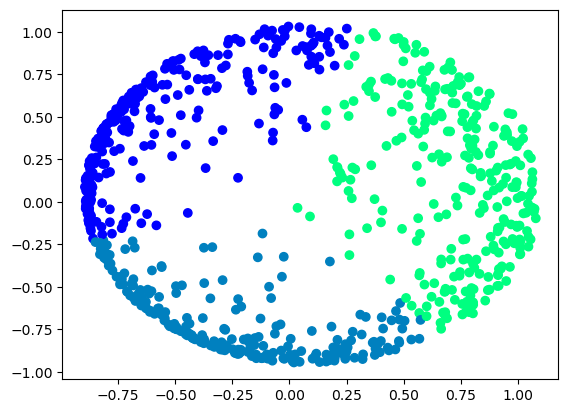

In [12]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


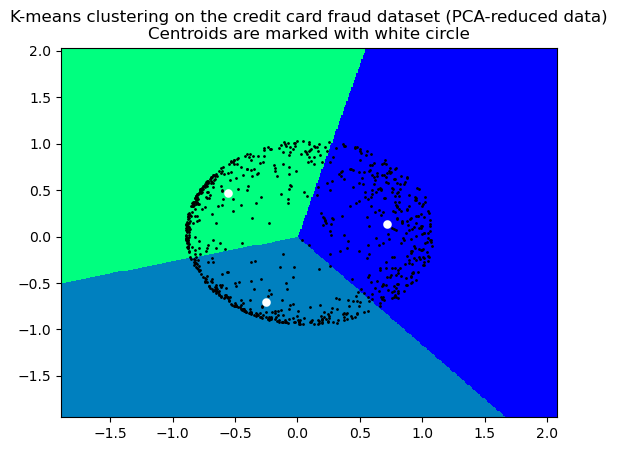

In [13]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_principal['P1'].min() - 1, X_principal['P1'].max() + 1
y_min, y_max = X_principal['P2'].min() - 1, X_principal['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(X_principal['P1'], X_principal['P2'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white circle')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [14]:
kmeans = KMeans(
   ...:     init="random",
   ...:     n_clusters=3,
   ...:     n_init=10,
   ...:     max_iter=300,
   ...:     random_state=42
   ...: )

In [16]:
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=3, random_state=42)

In [17]:
# The lowest SSE value
kmeans.inertia_

2468.7717166754674

In [18]:
#Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.08132708,  0.47312712,  0.3390154 , -0.06766762,  0.81815562],
       [-0.32201711, -0.41086728, -0.49471555,  0.03884874, -0.6578587 ],
       [ 3.48689514,  0.88574851,  3.29175479,  0.13747639,  0.83350667]])

In [19]:
 # The number of iterations required to converge
kmeans.n_iter_

8

In [21]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1,

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(scaled_df)
dbscan.fit(scaled_df)
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_df, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_df, dbscan.labels_).round (2)

In [28]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [29]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)
 # Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

In [30]:
kmeans_silhouette

0.5

In [31]:
dbscan_silhouette

0.38

In [32]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [33]:
round(ari_kmeans, 2)

0.47

In [34]:
round(ari_dbscan, 2)

1.0

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = pca.fit(df).transform(df)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target=df['name']
le.fit(target)
y_lan = le.transform(target)
pca_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
pca_df["PCA1"] = X[:, 0]
pca_df["PCA2"] = X[:, 1]
pca_df["Gene"] = target
pca_df["label"] = y_lan
sns.set(style="whitegrid", palette="muted")
#sns.set_theme(style=”whitegrid”)
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Disease", data=pca_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig(“GSE122505_Leukemia_PCA.pdf”, dpi = 300)
#plt.savefig(“GSE122505_Leukemia_PCA.png”)
#pca_df.to_csv(“GSE122505_Leukemia_PCA.csv”)

ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=5 with svd_solver='full'